In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt  # Thêm dòng này

In [ ]:

# Tạo dữ liệu ngẫu nhiên với 1000 mẫu
np.random.seed(42)  # Đặt seed để kết quả có thể tái hiện

n_samples = 1000
data = {
    'Light (lux)': np.random.uniform(5000, 60000, n_samples),  # Ánh sáng từ 5,000 - 60,000 lux
    'Temperature (°C)': np.random.uniform(5, 35, n_samples),   # Nhiệt độ từ 5°C - 35°C
    'Humidity (%)': np.random.uniform(20, 90, n_samples),      # Độ ẩm từ 20% - 90%
    'Soil Moisture (%)': np.random.uniform(5, 60, n_samples)   # Độ ẩm đất từ 5% - 60%
}

# Chuyển thành DataFrame
df = pd.DataFrame(data)

# Hàm gán nhãn dựa trên điều kiện tối ưu
def assign_label(row):
    light_ok = 10000 <= row['Light (lux)'] <= 50000
    temp_ok = 15 <= row['Temperature (°C)'] <= 25
    humid_ok = 50 <= row['Humidity (%)'] <= 70
    soil_ok = 20 <= row['Soil Moisture (%)'] <= 40
    
    if light_ok and temp_ok and humid_ok and soil_ok:
        return 'Normal'
    else:
        return 'Not Normal'

# Thêm cột growth vào dataset
df['Growth'] = df.apply(assign_label, axis=1)

# save csv file
df.to_csv('apple_tree_dataset_1000.csv', index=False)


In [3]:

# Hiển thị 5 dòng đầu tiên
print("Dataset mẫu (5 dòng đầu tiên):")
print(df.head())


Dataset mẫu (5 dòng đầu tiên):
    Light (lux)  Temperature (°C)  Humidity (%)  Soil Moisture (%)      Growth
0  25599.706537         10.553988     38.319398          41.998665  Not Normal
1  57289.286853         21.257028     37.288516          48.817477  Not Normal
2  45259.666800         31.188375     83.437821          18.775734  Not Normal
3  37926.216631         26.966747     37.468234          39.368075  Not Normal
4  13581.025224         29.196834     39.036481          36.446029  Not Normal


In [4]:

# Chuẩn bị dữ liệu để huấn luyện
X = df.drop('Growth', axis=1)  # Đặc trưng
y = df['Growth']              # Nhãn

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Khởi tạo và huấn luyện mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = dt_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("\nĐộ chính xác của mô hình:", accuracy)
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Ví dụ dự đoán trên một mẫu mới
new_sample = np.array([[20000, 22, 60, 30]])  # Light, Temp, Humidity, Soil Moisture
prediction = dt_model.predict(new_sample)
print("\nDự đoán cho mẫu mới [20000 lux, 22°C, 60%, 30%]:", prediction[0])


Độ chính xác của mô hình: 0.99

Báo cáo phân loại:
              precision    recall  f1-score   support

      Normal       0.67      0.67      0.67         3
  Not Normal       0.99      0.99      0.99       197

    accuracy                           0.99       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.99      0.99      0.99       200


Dự đoán cho mẫu mới [20000 lux, 22°C, 60%, 30%]: Normal


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


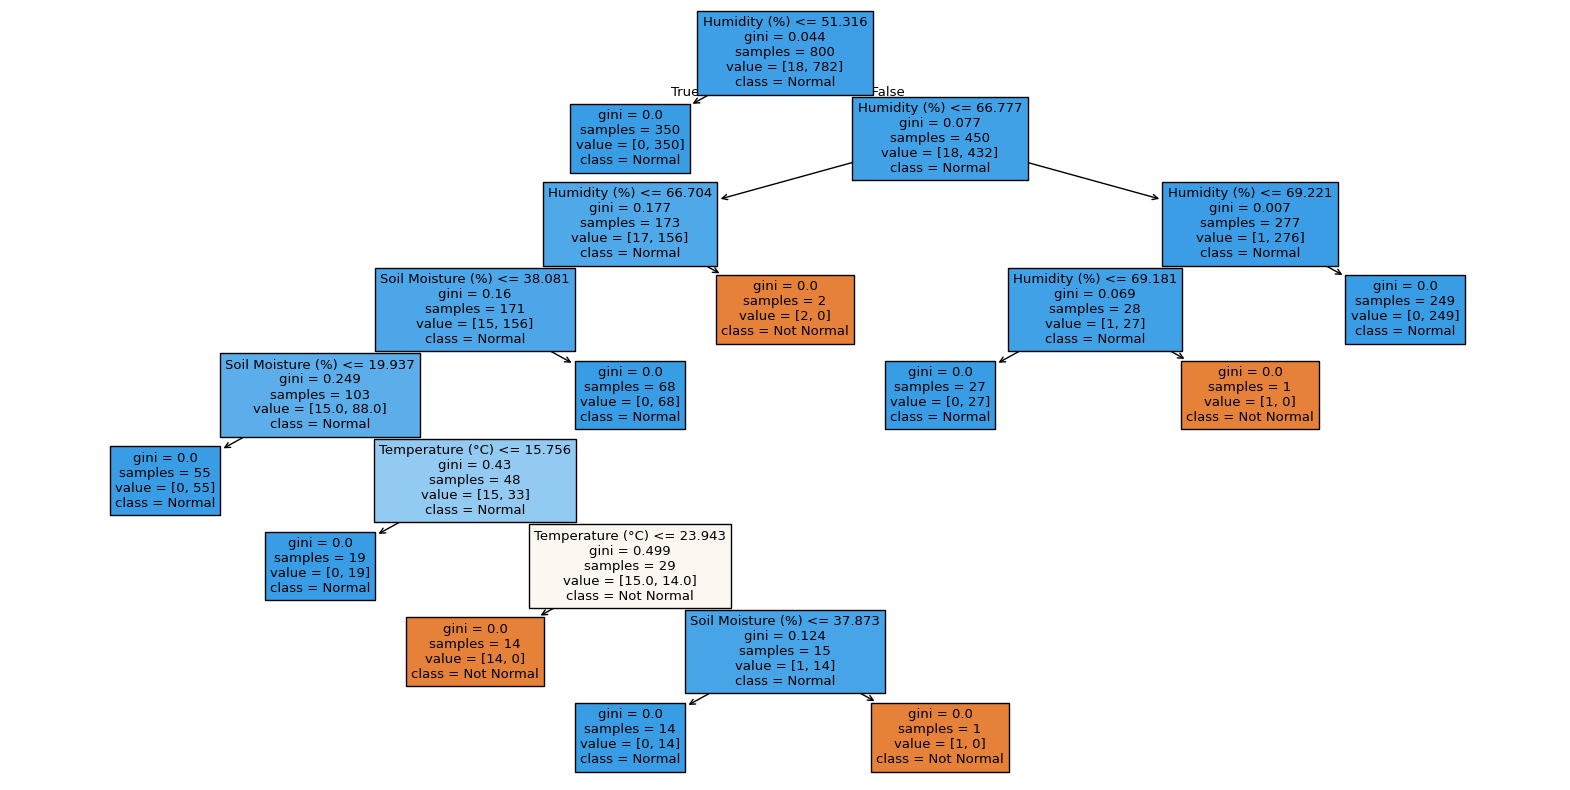

In [10]:
# Trực quan hóa cây quyết định (tùy chọn)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Normal', 'Normal'], filled=True)
plt.show()